In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.impute import SimpleImputer

## **Dealing with Categorical Variables:**

1. GetDummy Method
2. Label Encoder
3. OneHot Encoder
4. Replace Directly if only 2 or 3 categories are present



**We apply One-Hot Encoding when:**

The categorical feature is not ordinal (like the countries above)
The number of categorical features is less so one-hot encoding can be effectively applied.

**We apply Label Encoding when:**

The categorical feature is ordinal (like Jr. kg, Sr. kg, Primary school, high school)
 The number of categories is quite large as one-hot encoding can lead to high memory consumption

In [ ]:
df=pd.DataFrame({"Name":["Vikas","Mohit","Suchit","Aanchal","Himani"],"Gender":["M","M","M","F","F"],"Winner":["Y","N","N","Y","N"]})
df.head()

,Name,Gender,Winner
0,Vikas,M,Y
1,Mohit,M,N
2,Suchit,M,N
3,Aanchal,F,Y
4,Himani,F,N


### **GetDummy Method**

In [ ]:
temp=pd.get_dummies(df["Gender"])
temp

,F,M
0,0,1
1,0,1
2,0,1
3,1,0
4,1,0


In [ ]:
pd.concat([df,temp],axis=1)

,Name,Gender,Winner,F,M
0,Vikas,M,Y,0,1
1,Mohit,M,N,0,1
2,Suchit,M,N,0,1
3,Aanchal,F,Y,1,0
4,Himani,F,N,1,0


In [ ]:
pd.get_dummies(df,columns=["Gender","Winner"], drop_first=True)

,Name,Gender_M,Winner_Y
0,Vikas,1,1
1,Mohit,1,0
2,Suchit,1,0
3,Aanchal,0,1
4,Himani,0,0


In [ ]:
pd.get_dummies(df,columns=["Gender","Winner"], drop_first=True, prefix="roadies")

,Name,roadies_M,roadies_Y
0,Vikas,1,1
1,Mohit,1,0
2,Suchit,1,0
3,Aanchal,0,1
4,Himani,0,0


### **OneHot Encoder**

In [ ]:
ohe=OneHotEncoder(sparse=False)
ohe.fit_transform(df[["Gender"]]) # requires 2D array
# returns numpy array

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.]])

In [ ]:
pd.DataFrame(ohe.fit_transform(df[["Gender"]]))

,0,1
0,0.0,1.0
1,0.0,1.0
2,0.0,1.0
3,1.0,0.0
4,1.0,0.0


In [ ]:
ohe=OneHotEncoder(sparse=False,drop="first")
ohe.fit_transform(df[["Gender","Winner"]]) # requires 2D array
# returns numpy array

array([[1., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 0.]])

In [ ]:
pd.DataFrame(ohe.fit_transform(df[["Gender","Winner"]]))

,0,1
0,1.0,1.0
1,1.0,0.0
2,1.0,0.0
3,0.0,1.0
4,0.0,0.0


In [ ]:
pd.DataFrame(ohe.fit_transform(df[["Gender","Winner"]]), columns=["Gender","Winner"])

,Gender,Winner
0,1.0,1.0
1,1.0,0.0
2,1.0,0.0
3,0.0,1.0
4,0.0,0.0


### **Replace Method**

In [ ]:
df["Gender"].replace(["M","F"],["1","0"])
# df['loan_status'] = df.loan_status.map({'Fully Paid':0, 'Charged Off':1})

0    1
1    1
2    1
3    0
4    0
Name: Gender, dtype: object

In [ ]:
df["Gender"].replace(to_replace=["M","F"],value=["1","0"])

0    1
1    1
2    1
3    0
4    0
Name: Gender, dtype: object

In [ ]:
# used for ordinal data but using here just to show the result
le=LabelEncoder()
le.fit_transform(df["Gender"])
# returns numpy array

array([1, 1, 1, 0, 0])

In [ ]:
pd.DataFrame(le.fit_transform(df["Gender"]))

,0
0,1
1,1
2,1
3,0
4,0


### **Label Encoder**

**Adding Rank column for Label Encoder**

In [ ]:
df

,Name,Gender,Winner
0,Vikas,M,Y
1,Mohit,M,N
2,Suchit,M,N
3,Aanchal,F,Y
4,Himani,F,N


In [ ]:
len(df)

5

In [ ]:
#Adding more rows 
df.loc[len(df)]=["Suraj","M","N"]
df.loc[len(df.index)]=["Suraj","M","N"]

In [ ]:
df

,Name,Gender,Winner
0,Vikas,M,Y
1,Mohit,M,N
2,Suchit,M,N
3,Aanchal,F,Y
4,Himani,F,N
5,Suraj,M,N
6,Suraj,M,N


In [ ]:
df["Performance"]=["Good","VGood","VGood","Avg","Good","Poor","Poor"]

In [ ]:
df

,Name,Gender,Winner,Performance
0,Vikas,M,Y,Good
1,Mohit,M,N,VGood
2,Suchit,M,N,VGood
3,Aanchal,F,Y,Avg
4,Himani,F,N,Good
5,Suraj,M,N,Poor
6,Suraj,M,N,Poor


In [ ]:
# will not create new columns and assign 0,1,2,3 values inplace of categories

le=LabelEncoder()
pd.DataFrame(le.fit_transform(df["Performance"]))

,0
0,1
1,3
2,3
3,0
4,1
5,2
6,2


In [ ]:
# get dummy method creating new column for each category which leads to increase in dimension
pd.get_dummies(df["Performance"])

,Avg,Good,Poor,VGood
0,0,1,0,0
1,0,0,0,1
2,0,0,0,1
3,1,0,0,0
4,0,1,0,0
5,0,0,1,0
6,0,0,1,0


In [ ]:
# onehot encoding creating new column for each category which leads to increase in dimension
pd.DataFrame(ohe.fit_transform(df[["Performance"]]))

,0,1,2
0,1.0,0.0,0.0
1,0.0,0.0,1.0
2,0.0,0.0,1.0
3,0.0,0.0,0.0
4,1.0,0.0,0.0
5,0.0,1.0,0.0
6,0.0,1.0,0.0


## **Dealing with NAN or missing Values**

1. Finding and visualizing null values.
2. Dropping null values.
3. Fill null values with mean, median,mode using replace.
4. Filling null values using backward and forward fill.
5. Using sklearn simple imputer to fill with mean, most_frequent.

In [ ]:
df

,Name,Gender,Winner,Performance
0,Vikas,M,Y,Good
1,Mohit,M,N,VGood
2,Suchit,M,N,VGood
3,Aanchal,F,Y,Avg
4,Himani,F,N,Good
5,Suraj,M,N,Poor
6,Suraj,M,N,Poor


In [ ]:
# adding numerical variable
df["TaskCompleted"]=[10,12,12,7,9,3,3]

In [ ]:
# adding some null values in dataset
df.loc[len(df)]=["Diyali","F",np.nan,np.nan,np.nan]
df.loc[len(df)]=["Taranjeet","F","N",np.nan,10]
df.loc[len(df)]=["Pratima",np.nan,np.nan,np.nan,8]
df.loc[len(df)]=["Pratima",np.nan,np.nan,np.nan,8]
df.loc[len(df)]=["Numan","M","Y",np.nan,12]
df.loc[len(df)]=["Numan","M","Y",np.nan,12]
df.loc[len(df)]=["Diyali","F",np.nan,np.nan,np.nan]
df.loc[len(df)]=["Taranjeet","F","N",np.nan,10]
df.loc[len(df)]=["Pratima",np.nan,np.nan,np.nan,8]
df.loc[len(df)]=["Pratima",np.nan,np.nan,np.nan,8]
df.loc[len(df)]=["Numan","M","Y",np.nan,12]
df.loc[len(df)]=["Numan","M","Y",np.nan,12]
df.loc[len(df)]=[np.nan,np.nan,np.nan,np.nan,np.nan]

In [ ]:
df["Other"]=[np.nan,np.nan,"Other","Other","Other","Other","Other","Other","Other","Other","Other","Other","Other","Other","Other","Other","Other","Other",np.nan,np.nan]

In [ ]:
df

,Name,Gender,Winner,Performance,TaskCompleted,Other
0,Vikas,M,Y,Good,10.0,NaN
1,Mohit,M,N,VGood,12.0,NaN
2,Suchit,M,N,VGood,12.0,Other
3,Aanchal,F,Y,Avg,7.0,Other
4,Himani,F,N,Good,9.0,Other
5,Suraj,M,N,Poor,3.0,Other
6,Suraj,M,N,Poor,3.0,Other
7,Diyali,F,NaN,NaN,NaN,Other
8,Taranjeet,F,N,NaN,10.0,Other
9,Pratima,NaN,NaN,NaN,8.0,Other


###**Finding and visualizing null values**

In [ ]:
df.isnull().sum()

Name              1
Gender            5
Winner            7
Performance      13
TaskCompleted     3
Other             4
dtype: int64

In [ ]:
# percentage of null values for each column
round(df.isnull().sum()*100/len(df),2)

Name              5.0
Gender           25.0
Winner           35.0
Performance      65.0
TaskCompleted    15.0
Other            20.0
dtype: float64

58% missing or NaN values in Performance

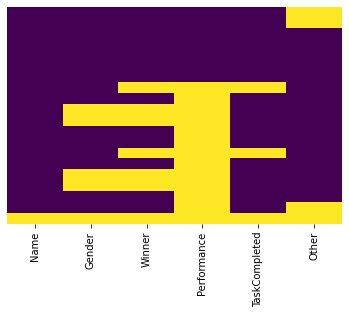

In [ ]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap="viridis")

In [ ]:
#finding total null values in complete dataset
df.isnull().sum().sum()

33

### **Dropping null values**

In [ ]:
df.dropna(axis=0,how="all") # drop row which have all null value

,Name,Gender,Winner,Performance,TaskCompleted,Other
0,Vikas,M,Y,Good,10.0,NaN
1,Mohit,M,N,VGood,12.0,NaN
2,Suchit,M,N,VGood,12.0,Other
3,Aanchal,F,Y,Avg,7.0,Other
4,Himani,F,N,Good,9.0,Other
5,Suraj,M,N,Poor,3.0,Other
6,Suraj,M,N,Poor,3.0,Other
7,Diyali,F,NaN,NaN,NaN,Other
8,Taranjeet,F,N,NaN,10.0,Other
9,Pratima,NaN,NaN,NaN,8.0,Other


In [ ]:
df.dropna(subset=["Gender","TaskCompleted"],axis=0) # drop rows for which gender and taskcompleted have null values

,Name,Gender,Winner,Performance,TaskCompleted,Other
0,Vikas,M,Y,Good,10.0,NaN
1,Mohit,M,N,VGood,12.0,NaN
2,Suchit,M,N,VGood,12.0,Other
3,Aanchal,F,Y,Avg,7.0,Other
4,Himani,F,N,Good,9.0,Other
5,Suraj,M,N,Poor,3.0,Other
6,Suraj,M,N,Poor,3.0,Other
8,Taranjeet,F,N,NaN,10.0,Other
11,Numan,M,Y,NaN,12.0,Other
12,Numan,M,Y,NaN,12.0,Other


In [ ]:
df.dropna(subset=["Performance"],axis=0)

,Name,Gender,Winner,Performance,TaskCompleted,Other
0,Vikas,M,Y,Good,10.0,NaN
1,Mohit,M,N,VGood,12.0,NaN
2,Suchit,M,N,VGood,12.0,Other
3,Aanchal,F,Y,Avg,7.0,Other
4,Himani,F,N,Good,9.0,Other
5,Suraj,M,N,Poor,3.0,Other
6,Suraj,M,N,Poor,3.0,Other


In [ ]:
df.dropna(axis=0) # default how="any"

,Name,Gender,Winner,Performance,TaskCompleted,Other
2,Suchit,M,N,VGood,12.0,Other
3,Aanchal,F,Y,Avg,7.0,Other
4,Himani,F,N,Good,9.0,Other
5,Suraj,M,N,Poor,3.0,Other
6,Suraj,M,N,Poor,3.0,Other


In [ ]:
df.dropna(how="any",axis=0)

,Name,Gender,Winner,Performance,TaskCompleted,Other
2,Suchit,M,N,VGood,12.0,Other
3,Aanchal,F,Y,Avg,7.0,Other
4,Himani,F,N,Good,9.0,Other
5,Suraj,M,N,Poor,3.0,Other
6,Suraj,M,N,Poor,3.0,Other


### **Fill null values with mean, median,mode using replace**

In [ ]:
replacement={"Name":"Brijesh","Gender":"M","Winner":"Y","Performance":"VGood","TaskCompleted":"12"}
df.fillna(value=replacement)

,Name,Gender,Winner,Performance,TaskCompleted,Other
0,Vikas,M,Y,Good,10.0,NaN
1,Mohit,M,N,VGood,12.0,NaN
2,Suchit,M,N,VGood,12.0,Other
3,Aanchal,F,Y,Avg,7.0,Other
4,Himani,F,N,Good,9.0,Other
5,Suraj,M,N,Poor,3.0,Other
6,Suraj,M,N,Poor,3.0,Other
7,Diyali,F,Y,VGood,12,Other
8,Taranjeet,F,N,VGood,10.0,Other
9,Pratima,M,Y,VGood,8.0,Other


In [ ]:
df["Performance"].replace(to_replace=np.nan,value="Other_value")

0            Good
1           VGood
2           VGood
3             Avg
4            Good
5            Poor
6            Poor
7     Other_value
8     Other_value
9     Other_value
10    Other_value
11    Other_value
12    Other_value
13    Other_value
14    Other_value
15    Other_value
16    Other_value
17    Other_value
18    Other_value
19    Other_value
Name: Performance, dtype: object

In [ ]:
df.replace(to_replace=np.nan,value="Other_value")

,Name,Gender,Winner,Performance,TaskCompleted,Other
0,Vikas,M,Y,Good,10.0,Other_value
1,Mohit,M,N,VGood,12.0,Other_value
2,Suchit,M,N,VGood,12.0,Other
3,Aanchal,F,Y,Avg,7.0,Other
4,Himani,F,N,Good,9.0,Other
5,Suraj,M,N,Poor,3.0,Other
6,Suraj,M,N,Poor,3.0,Other
7,Diyali,F,Other_value,Other_value,Other_value,Other
8,Taranjeet,F,N,Other_value,10.0,Other
9,Pratima,Other_value,Other_value,Other_value,8.0,Other


In [ ]:
df["TaskCompleted"].median()

10.0

In [ ]:
df["TaskCompleted"].replace(to_replace=np.nan,value=df["TaskCompleted"].median())

0     10.0
1     12.0
2     12.0
3      7.0
4      9.0
5      3.0
6      3.0
7     10.0
8     10.0
9      8.0
10     8.0
11    12.0
12    12.0
13    10.0
14    10.0
15     8.0
16     8.0
17    12.0
18    12.0
19    10.0
Name: TaskCompleted, dtype: float64

In [ ]:
df["Performance"].mode()[0]

'Good'

In [ ]:
df["Performance"].replace(to_replace=np.nan,value=df["Performance"].mode()[0])

0      Good
1     VGood
2     VGood
3       Avg
4      Good
5      Poor
6      Poor
7      Good
8      Good
9      Good
10     Good
11     Good
12     Good
13     Good
14     Good
15     Good
16     Good
17     Good
18     Good
19     Good
Name: Performance, dtype: object

### **Filling null values using backward and forward fill**

In [ ]:
# filling NaN values using backwardfill--> replacing NaN value with next valid row value but if last value is itself null it will remain unchanged
# as there is no next value present
# goes from last value till first value (from down to top)

#filling from backward
df.fillna(method="bfill")

,Name,Gender,Winner,Performance,TaskCompleted,Other
0,Vikas,M,Y,Good,10.0,Other
1,Mohit,M,N,VGood,12.0,Other
2,Suchit,M,N,VGood,12.0,Other
3,Aanchal,F,Y,Avg,7.0,Other
4,Himani,F,N,Good,9.0,Other
5,Suraj,M,N,Poor,3.0,Other
6,Suraj,M,N,Poor,3.0,Other
7,Diyali,F,N,NaN,10.0,Other
8,Taranjeet,F,N,NaN,10.0,Other
9,Pratima,M,Y,NaN,8.0,Other


In [ ]:
df

,Name,Gender,Winner,Performance,TaskCompleted,Other
0,Vikas,M,Y,Good,10.0,NaN
1,Mohit,M,N,VGood,12.0,NaN
2,Suchit,M,N,VGood,12.0,Other
3,Aanchal,F,Y,Avg,7.0,Other
4,Himani,F,N,Good,9.0,Other
5,Suraj,M,N,Poor,3.0,Other
6,Suraj,M,N,Poor,3.0,Other
7,Diyali,F,NaN,NaN,NaN,Other
8,Taranjeet,F,N,NaN,10.0,Other
9,Pratima,NaN,NaN,NaN,8.0,Other


In [ ]:
# filling NaN values using forwardfill--> replacing NaN value with previous valid row value but if first value is itself null it will remain unchanged
# as there is no previous present

#filling from forward, from top to down

df.fillna(method="ffill")

,Name,Gender,Winner,Performance,TaskCompleted,Other
0,Vikas,M,Y,Good,10.0,NaN
1,Mohit,M,N,VGood,12.0,NaN
2,Suchit,M,N,VGood,12.0,Other
3,Aanchal,F,Y,Avg,7.0,Other
4,Himani,F,N,Good,9.0,Other
5,Suraj,M,N,Poor,3.0,Other
6,Suraj,M,N,Poor,3.0,Other
7,Diyali,F,N,Poor,3.0,Other
8,Taranjeet,F,N,Poor,10.0,Other
9,Pratima,F,N,Poor,8.0,Other


In [ ]:
df["TaskCompleted"].mode()[0]

12.0

### **Using sklearn simple imputer to fill with mean, most_frequent**

In [ ]:
from sklearn.impute import SimpleImputer

imp=SimpleImputer(missing_values=np.nan,strategy="most_frequent")
imp.fit_transform(df[["TaskCompleted"]]) # requires 2D array
# returns numpy array, use pandas to convert it to dataframe

array([[10.],
       [12.],
       [12.],
       [ 7.],
       [ 9.],
       [ 3.],
       [ 3.],
       [12.],
       [10.],
       [ 8.],
       [ 8.],
       [12.],
       [12.],
       [12.],
       [10.],
       [ 8.],
       [ 8.],
       [12.],
       [12.],
       [12.]])

In [ ]:
import numpy as np
from sklearn.impute import KNNImputer
X = [[1, 2, np.nan], [3, 4, 3], [np.nan, 6, 5], [8, 8, 7]]
imputer = KNNImputer(n_neighbors=2)
imputer.fit_transform(X)

In [ ]:
pd.DataFrame(imp.fit_transform(df))

,0,1,2,3,4,5
0,Vikas,M,Y,Good,10.0,Other
1,Mohit,M,N,VGood,12.0,Other
2,Suchit,M,N,VGood,12.0,Other
3,Aanchal,F,Y,Avg,7.0,Other
4,Himani,F,N,Good,9.0,Other
5,Suraj,M,N,Poor,3.0,Other
6,Suraj,M,N,Poor,3.0,Other
7,Diyali,F,N,Good,12.0,Other
8,Taranjeet,F,N,Good,10.0,Other
9,Pratima,M,N,Good,8.0,Other


In [ ]:
imp=SimpleImputer(missing_values=np.nan,strategy="median")
imp.fit_transform(df[["TaskCompleted"]])

array([[10.],
       [12.],
       [12.],
       [ 7.],
       [ 9.],
       [ 3.],
       [ 3.],
       [10.],
       [10.],
       [ 8.],
       [ 8.],
       [12.],
       [12.],
       [10.],
       [10.],
       [ 8.],
       [ 8.],
       [12.],
       [12.],
       [10.]])

## **Dealing with Duplicates and sorting**

1. Find Duplicate
2. Drop Duplicate
3. Sort values
4. Sort Index

In [ ]:
df

,Name,Gender,Winner,Performance,TaskCompleted,Other
0,Vikas,M,Y,Good,10.0,NaN
1,Mohit,M,N,VGood,12.0,NaN
2,Suchit,M,N,VGood,12.0,Other
3,Aanchal,F,Y,Avg,7.0,Other
4,Himani,F,N,Good,9.0,Other
5,Suraj,M,N,Poor,3.0,Other
6,Suraj,M,N,Poor,3.0,Other
7,Diyali,F,NaN,NaN,NaN,Other
8,Taranjeet,F,N,NaN,10.0,Other
9,Pratima,NaN,NaN,NaN,8.0,Other


### **Find Duplicate**

In [ ]:
df.duplicated()# return whether duplicates are present or not for each row

0     False
1     False
2     False
3     False
4     False
5     False
6      True
7     False
8     False
9     False
10     True
11    False
12     True
13     True
14     True
15     True
16     True
17     True
18    False
19    False
dtype: bool

In [ ]:
np.any(df.duplicated()) # return whether duplicates are present or not for complete dataset

True

In [ ]:
df[df.duplicated()] # shows duplicated rows

,Name,Gender,Winner,Performance,TaskCompleted,Other
6,Suraj,M,N,Poor,3.0,Other
10,Pratima,NaN,NaN,NaN,8.0,Other
12,Numan,M,Y,NaN,12.0,Other
13,Diyali,F,NaN,NaN,NaN,Other
14,Taranjeet,F,N,NaN,10.0,Other
15,Pratima,NaN,NaN,NaN,8.0,Other
16,Pratima,NaN,NaN,NaN,8.0,Other
17,Numan,M,Y,NaN,12.0,Other


### **Drop Duplicate**

In [ ]:
df.drop_duplicates(keep="first") # remove completed row which is duplicate

,Name,Gender,Winner,Performance,TaskCompleted,Other
0,Vikas,M,Y,Good,10.0,NaN
1,Mohit,M,N,VGood,12.0,NaN
2,Suchit,M,N,VGood,12.0,Other
3,Aanchal,F,Y,Avg,7.0,Other
4,Himani,F,N,Good,9.0,Other
5,Suraj,M,N,Poor,3.0,Other
7,Diyali,F,NaN,NaN,NaN,Other
8,Taranjeet,F,N,NaN,10.0,Other
9,Pratima,NaN,NaN,NaN,8.0,Other
11,Numan,M,Y,NaN,12.0,Other


In [ ]:
df.drop_duplicates(subset=["Name"],keep="first")# keep only the first value for Name column

,Name,Gender,Winner,Performance,TaskCompleted,Other
0,Vikas,M,Y,Good,10.0,NaN
1,Mohit,M,N,VGood,12.0,NaN
2,Suchit,M,N,VGood,12.0,Other
3,Aanchal,F,Y,Avg,7.0,Other
4,Himani,F,N,Good,9.0,Other
5,Suraj,M,N,Poor,3.0,Other
7,Diyali,F,NaN,NaN,NaN,Other
8,Taranjeet,F,N,NaN,10.0,Other
9,Pratima,NaN,NaN,NaN,8.0,Other
11,Numan,M,Y,NaN,12.0,Other


In [ ]:
df.drop_duplicates(subset=["Name"],keep="last")# keep only the last value for Name column

,Name,Gender,Winner,Performance,TaskCompleted,Other
0,Vikas,M,Y,Good,10.0,NaN
1,Mohit,M,N,VGood,12.0,NaN
2,Suchit,M,N,VGood,12.0,Other
3,Aanchal,F,Y,Avg,7.0,Other
4,Himani,F,N,Good,9.0,Other
6,Suraj,M,N,Poor,3.0,Other
13,Diyali,F,NaN,NaN,NaN,Other
14,Taranjeet,F,N,NaN,10.0,Other
16,Pratima,NaN,NaN,NaN,8.0,Other
18,Numan,M,Y,NaN,12.0,NaN


In [ ]:
df.drop_duplicates(subset=["Name"],keep=False) #drop all duplicated values for Name column

,Name,Gender,Winner,Performance,TaskCompleted,Other
0,Vikas,M,Y,Good,10.0,NaN
1,Mohit,M,N,VGood,12.0,NaN
2,Suchit,M,N,VGood,12.0,Other
3,Aanchal,F,Y,Avg,7.0,Other
4,Himani,F,N,Good,9.0,Other
19,NaN,NaN,NaN,NaN,NaN,NaN


### **Sort Values**

In [ ]:
df.sort_values(by="Name",ascending=True, axis=0)

,Name,Gender,Winner,Performance,TaskCompleted,Other
3,Aanchal,F,Y,Avg,7.0,Other
13,Diyali,F,NaN,NaN,NaN,Other
7,Diyali,F,NaN,NaN,NaN,Other
4,Himani,F,N,Good,9.0,Other
1,Mohit,M,N,VGood,12.0,NaN
18,Numan,M,Y,NaN,12.0,NaN
12,Numan,M,Y,NaN,12.0,Other
17,Numan,M,Y,NaN,12.0,Other
11,Numan,M,Y,NaN,12.0,Other
16,Pratima,NaN,NaN,NaN,8.0,Other


### **Sort Index**

In [ ]:
temp=df.set_index("Name")
temp

,Gender,Winner,Performance,TaskCompleted,Other
Name,,,,,
Vikas,M,Y,Good,10.0,NaN
Mohit,M,N,VGood,12.0,NaN
Suchit,M,N,VGood,12.0,Other
Aanchal,F,Y,Avg,7.0,Other
Himani,F,N,Good,9.0,Other
Suraj,M,N,Poor,3.0,Other
Suraj,M,N,Poor,3.0,Other
Diyali,F,NaN,NaN,NaN,Other
Taranjeet,F,N,NaN,10.0,Other


In [ ]:
temp.sort_index(ascending=True)

,Gender,Winner,Performance,TaskCompleted,Other
Name,,,,,
Aanchal,F,Y,Avg,7.0,Other
Diyali,F,NaN,NaN,NaN,Other
Diyali,F,NaN,NaN,NaN,Other
Himani,F,N,Good,9.0,Other
Mohit,M,N,VGood,12.0,NaN
Numan,M,Y,NaN,12.0,NaN
Numan,M,Y,NaN,12.0,Other
Numan,M,Y,NaN,12.0,Other
Numan,M,Y,NaN,12.0,Other


## **Other Operations**

1. pd.cut=> can be used to convert numerical feature into category.
Divide Task completed into 3 groups. 0-5, 5-10, 10-15 and label them as poor,avg,good.
2. pd.crosstab => can be used to convert categorical feature into numerical feature.
3. aggregate function in groupby

### **pd.cut**

In [ ]:
bins=[0,5,10,15]
labels=["poor","avg","good"]

# (0-5]  => poor
# (5-10] => avg
# (10-15]=> good

# bins will be one more than labels

df["TaskCompletedgroup"]=pd.cut(df["TaskCompleted"],bins=bins,labels=labels)
df

,Name,Gender,Winner,Performance,TaskCompleted,Other,TaskCompletedgroup
0,Vikas,M,Y,Good,10.0,NaN,avg
1,Mohit,M,N,VGood,12.0,NaN,good
2,Suchit,M,N,VGood,12.0,Other,good
3,Aanchal,F,Y,Avg,7.0,Other,avg
4,Himani,F,N,Good,9.0,Other,avg
5,Suraj,M,N,Poor,3.0,Other,poor
6,Suraj,M,N,Poor,3.0,Other,poor
7,Diyali,F,NaN,NaN,NaN,Other,NaN
8,Taranjeet,F,N,NaN,10.0,Other,avg
9,Pratima,NaN,NaN,NaN,8.0,Other,avg


### **pd.crosstab**

In [ ]:
pd.crosstab(df["TaskCompletedgroup"],df["Winner"])

Winner,N,Y
TaskCompletedgroup,,
poor,2,0
avg,3,2
good,2,4


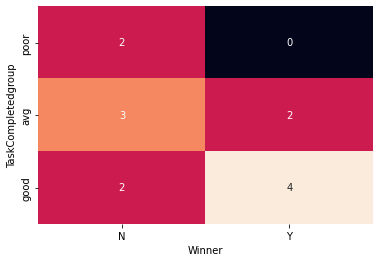

In [ ]:
sns.heatmap(pd.crosstab(df["TaskCompletedgroup"],df["Winner"]), cbar=False, annot=True)

In [ ]:
df[df["Winner"]=="Y"]["TaskCompletedgroup"].value_counts().reset_index()

,index,TaskCompletedgroup
0,good,4
1,avg,2
2,poor,0


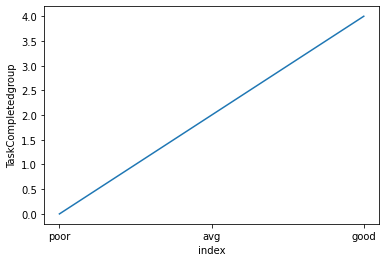

In [ ]:
sns.lineplot(x="index",y="TaskCompletedgroup",data=df[df["Winner"]=="Y"]["TaskCompletedgroup"].value_counts().reset_index())

### **aggregate function**

In [ ]:
df

,Name,Gender,Winner,Performance,TaskCompleted,Other,TaskCompletedgroup
0,Vikas,M,Y,Good,10.0,NaN,avg
1,Mohit,M,N,VGood,12.0,NaN,good
2,Suchit,M,N,VGood,12.0,Other,good
3,Aanchal,F,Y,Avg,7.0,Other,avg
4,Himani,F,N,Good,9.0,Other,avg
5,Suraj,M,N,Poor,3.0,Other,poor
6,Suraj,M,N,Poor,3.0,Other,poor
7,Diyali,F,NaN,NaN,NaN,Other,NaN
8,Taranjeet,F,N,NaN,10.0,Other,avg
9,Pratima,NaN,NaN,NaN,8.0,Other,avg


In [ ]:
df.groupby(["TaskCompletedgroup"]).agg({"Name":"count","TaskCompleted":"mean"})

,Name,TaskCompleted
TaskCompletedgroup,,
poor,2,3.000000
avg,9,8.666667
good,6,12.000000


In [ ]:
df.groupby(["TaskCompletedgroup"]).agg({"Name":"size","TaskCompleted":"mean"})

,Name,TaskCompleted
TaskCompletedgroup,,
poor,2,3.000000
avg,9,8.666667
good,6,12.000000


count and size are giving same output but have different functionality.

size include null values where count doesnt

In [ ]:
df.groupby(["TaskCompletedgroup"])["Winner"].size()

TaskCompletedgroup
poor    2
avg     9
good    6
Name: Winner, dtype: int64

In [ ]:
df.groupby(["TaskCompletedgroup"])["Winner"].count()

TaskCompletedgroup
poor    2
avg     5
good    6
Name: Winner, dtype: int64

winner has 4 null values where taskcompletedgroup has avg value so its not counted in count function but appearing in size function.